<h1>Homework 4: Understanding linear and trees-based models</h1>
<h2>Predictive Analytics using Python (CIS432)</h2>
<h3>Simon Business School</h3>

__Instructor__: Yaron Shaposhnik




### Instructions

In this homework assignment, you will train linear and tree-based models. You will experiment with their key hyper-parameters and observe how they affect the resulting models. This should improve your understanding of these models and help you create better ones.


## Answer key

This assignment (as well as others) is graded by comparing your answers (that is, the variables and Python objects you create) with precomputed answers. This allows you to get immediate feedback in order to find your errors and correct them. The downside of this approach is that the grading code is strict and even slight deviations from the desired outputs could result in reduction of points. 

To make this learning experience more efficient, the objects that you are asked to generate are provided to you in the variable `ANSWER_KEY`. Questions may ask you to assign a value (like a number or object such as data frame) to a variable. For example, in the second question you are asked to assign the variable `n_rows` with a certain value. To view the correct answer simply run the command `ANSWER_KEY['n_rows']`. 

Note that the answer key is provided to you __for debugging purposes only__. Using it in your final submission or hard-coding solutions __will be considered plagiarism__ and be reported to the student disciplinary committee.

In [1]:
# you may ignore this cell
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.impute import MissingIndicator
from sklearn.pipeline import Pipeline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from os import path

if os.name == 'nt':
    ANSWER_KEY_FILE_NAME = "answer_key(win).p"
elif os.name == 'posix':
    ANSWER_KEY_FILE_NAME = "answer_key(unix).p"
else:
    raise Exception('The code was not tested on',os.name)

GENERATE_ANSWER_KEY=False

if GENERATE_ANSWER_KEY: 
    ANSWER_KEY = {} 
else:        
    with open(ANSWER_KEY_FILE_NAME, "rb") as f:
        ANSWER_KEY = pickle.load( f )           

In [2]:
# example for using answer key
if GENERATE_ANSWER_KEY==False: 
    print(ANSWER_KEY['log_reg_coefficients'])

[-4.64310954e-02 -8.79499460e-04  4.23770780e-03 -7.41632243e-03
 -3.62875884e-02  1.74893670e-02 -2.60194127e-03 -1.04622670e-02
 -7.81241648e-03 -4.82429827e-02  1.92953710e-02  2.92711254e-03
  5.74364996e-03  6.54211533e-03 -6.13639243e-02  4.23083495e-01
 -3.72774119e-01  1.07352998e-02  3.61506768e-03  8.10170776e-02
 -1.62719951e-02  6.11945031e-02 -1.02188299e-03 -2.93964096e-01
  3.64192406e-01  1.44903520e-01  4.35123361e-01 -8.09829559e-01
  3.77455492e-03 -3.48503076e-02 -3.18921522e-01  3.10313158e-01
  5.09875711e-01 -7.15182800e-01  5.12237046e+00]


In [3]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# Beginning of homework 4

In previous homework assignments you created and evaluated models based on the HELOC dataset. Let's reload the data.

In [4]:
PREPROCESSED_DATA_FILE_NAME = "preprocessed_data.p"
with open(PREPROCESSED_DATA_FILE_NAME, "rb") as f:
    PREPROCESSED_DATA = pickle.load( f )               

X_train_t_tr,  Y_train_t_tr  = PREPROCESSED_DATA['X_train_t_tr'],  PREPROCESSED_DATA['Y_train_t_tr']
X_train_t_val, Y_train_t_val = PREPROCESSED_DATA['X_train_t_val'], PREPROCESSED_DATA['Y_train_t_val']
X_test_t,      Y_test        = PREPROCESSED_DATA['X_test_t'],      PREPROCESSED_DATA['Y_test']
n = len(Y_train_t_tr) + len(Y_train_t_val) + len(Y_test)
column_names = PREPROCESSED_DATA['column_names']

print('Train data:      X_train_t_tr:', X_train_t_tr.shape, ' Y_train_t_tr:', Y_train_t_tr.shape)
print('Validation data: X_train_t_val:', X_train_t_val.shape, 'Y_train_t_val:', Y_train_t_val.shape)
print('Test data:       X_test_t:', X_test_t.shape, '     Y_test:', Y_test.shape)
print('\nThe proportion of train,validation,test data is %.1f:%.1f:%.1f\n'%(len(Y_train_t_tr)/n, len(Y_train_t_val)/n, len(Y_test)/n))
print('column_names:',column_names)

Train data:      X_train_t_tr: (5916, 34)  Y_train_t_tr: (5916,)
Validation data: X_train_t_val: (1972, 34) Y_train_t_val: (1972,)
Test data:       X_test_t: (1973, 34)      Y_test: (1973,)

The proportion of train,validation,test data is 0.6:0.2:0.2

column_names: ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance', 'MSinceMostRecentDelq=-7', 'MSinceMostRecentInqexcl7days=-7', 'MSinceOldestTradeOpen=-8', 'MSinceMostRecentDelq=-8', 'MSinceMostRecentInq

The file `preprocessed_data.p` contains the preprocessed data split into 3 sets: train, validation, and test. The previous code cell loaded the data to memory and assigned it to variables indicating the set and whether the variable refers to features (X) or labels (Y). That is, `X_train_t_tr`, `X_train_t_val`, and `X_test_t` hold the preprocessed train, validation, and test sets, while `Y_train_t_tr`, `Y_train_t_val`, and `Y_test`, hold the corresponding labels. The variable `column_names` holds the list of column names. 


In [5]:
X_train_t_tr.head(5)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
1509,73.0,475.0,6.0,139.0,47.0,0.0,0.0,96.0,65.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4382,74.0,111.0,2.0,52.0,26.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4932,65.0,212.0,8.0,60.0,19.0,0.0,0.0,96.0,4.000000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3286,77.0,201.0,1.0,73.0,23.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2406,64.0,175.0,4.0,63.0,27.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 1: Linear models

Let's use the train set to train a few linear models and compare them.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [7]:
log_reg = LogisticRegression(max_iter=10000, random_state=0).fit(X_train_t_tr, Y_train_t_tr) # Logistic regression
svc     = SGDClassifier(max_iter=1000, random_state=0).fit(X_train_t_tr, Y_train_t_tr)       # Linear SVM
nb      = BernoulliNB().fit(X_train_t_tr, Y_train_t_tr)                                      # Naive Bayes
lda     = LinearDiscriminantAnalysis().fit(X_train_t_tr, Y_train_t_tr)                       # LDA

In [8]:
print('Train accuracy')
print('Log. Reg. accuracy: %.3f'%log_reg.score(X_train_t_tr, Y_train_t_tr))
print('Linear SVC accuracy: %.3f'%svc.score(X_train_t_tr, Y_train_t_tr))
print('Naive Bayes accuracy: %.3f'%nb.score(X_train_t_tr, Y_train_t_tr))
print('LDA accuracy: %.3f'%lda.score(X_train_t_tr, Y_train_t_tr)) 

print('\nValidation accuracy')
print('Log. Reg. accuracy: %.3f'%log_reg.score(X_train_t_val, Y_train_t_val))
print('Linear SVC accuracy: %.3f'%svc.score(X_train_t_val, Y_train_t_val))
print('Naive Bayes accuracy: %.3f'%nb.score(X_train_t_val, Y_train_t_val))
print('LDA accuracy: %.3f'%lda.score(X_train_t_val, Y_train_t_val)) 

Train accuracy
Log. Reg. accuracy: 0.741
Linear SVC accuracy: 0.696
Naive Bayes accuracy: 0.678
LDA accuracy: 0.742

Validation accuracy
Log. Reg. accuracy: 0.731
Linear SVC accuracy: 0.689
Naive Bayes accuracy: 0.676
LDA accuracy: 0.731


### q1
Initialize the variables `log_reg_coefficients`, `svc_coefficients`, `nb_coefficients`, and `lda_coefficients` so that each holds an array with the linear coefficients followed by the intercept corresponding to each model (that is, the intercept should be stored as the last element of `log_reg_coefficients` and the other arrays).

In [9]:
log_reg_coefficients = np.append(log_reg.coef_[0], log_reg.intercept_) #we need to have the same format as the supposed output...
svc_coefficients = np.append(svc.coef_[0], svc.intercept_)
nb_coefficients = np.append(nb.coef_[0], nb.intercept_)
lda_coefficients = np.append(lda.coef_[0], lda.intercept_)
###
### YOUR CODE HERE
###


/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `intercept_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [10]:
# example
ANSWER_KEY['log_reg_coefficients']

array([-4.64310954e-02, -8.79499460e-04,  4.23770780e-03, -7.41632243e-03,
       -3.62875884e-02,  1.74893670e-02, -2.60194127e-03, -1.04622670e-02,
       -7.81241648e-03, -4.82429827e-02,  1.92953710e-02,  2.92711254e-03,
        5.74364996e-03,  6.54211533e-03, -6.13639243e-02,  4.23083495e-01,
       -3.72774119e-01,  1.07352998e-02,  3.61506768e-03,  8.10170776e-02,
       -1.62719951e-02,  6.11945031e-02, -1.02188299e-03, -2.93964096e-01,
        3.64192406e-01,  1.44903520e-01,  4.35123361e-01, -8.09829559e-01,
        3.77455492e-03, -3.48503076e-02, -3.18921522e-01,  3.10313158e-01,
        5.09875711e-01, -7.15182800e-01,  5.12237046e+00])

In [11]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['log_reg_coefficients'], log_reg_coefficients, rtol=0, atol=0.01).all()), 'testing log_reg_coefficients'
### END TEST

In [12]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['svc_coefficients'], svc_coefficients, rtol=0, atol=0.01).all()), 'testing svc_coefficients'
### END TEST

In [13]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['nb_coefficients'], nb_coefficients, rtol=0, atol=0.01).all()), 'testing nb_coefficients'
### END TEST

In [14]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['lda_coefficients'], lda_coefficients, rtol=0, atol=0.01).all()), 'testing lda_coefficients'
### END TEST

### q2 
Create the dataframe `linear_coefficients` which holds the coefficients of the 4 models. Each column should correspond to a model (`Log. Reg.`,`SVC`,`NB` and `LDA`; use these exact column names). The rows should hold the column names of the HELOC dataset (which can be found in the variable `column_names` which was initialized above), with one additional row for the intercept of each linear function.

In [15]:
cols = X_train_t_tr.columns.to_list()
cols.append("intercept")

In [16]:
linear_coefficients1 = (pd.DataFrame(data = np.vstack([log_reg_coefficients,svc_coefficients, nb_coefficients, lda_coefficients]), 
                                    columns = cols).T)
linear_coefficients1.columns = ['Log. Reg.', 'SVC', 'NB', 'LDA']
linear_coefficients = linear_coefficients1
linear_coefficients

,Log. Reg.,SVC,NB,LDA
ExternalRiskEstimate,-0.046431,0.078089,-0.000324,-0.059394
MSinceOldestTradeOpen,-0.000879,-1.046468,-0.000324,-0.000899
MSinceMostRecentTradeOpen,0.004238,2.001041,-0.010434,0.003865
AverageMInFile,-0.007416,-1.669161,-0.000324,-0.007237
NumSatisfactoryTrades,-0.036288,-11.547468,-0.000974,-0.040926
NumTrades60Ever2DerogPubRec,0.017489,40.860272,-0.900362,0.013174
NumTrades90Ever2DerogPubRec,-0.002602,-4.187543,-1.219116,-0.013706
PercentTradesNeverDelq,-0.010462,-0.976117,-0.000974,-0.007011
MSinceMostRecentDelq,-0.007812,-4.957465,-0.014375,-0.008531
MaxDelq2PublicRecLast12M,-0.048243,-27.126301,-0.050218,-0.038348


In [17]:
# expected output
ANSWER_KEY['linear_coefficients'].head()

,Log. Reg.,SVC,NB,LDA
ExternalRiskEstimate,-0.046431,0.078089,-0.000324,-0.059394
MSinceOldestTradeOpen,-0.000879,-1.046468,-0.000324,-0.000899
MSinceMostRecentTradeOpen,0.004238,2.001041,-0.010434,0.003865
AverageMInFile,-0.007416,-1.669161,-0.000324,-0.007237
NumSatisfactoryTrades,-0.036288,-11.547468,-0.000974,-0.040926


In [18]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['linear_coefficients'].round(2)
diff = sol.compare(linear_coefficients.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing linear_coefficients'
### END TEST 

### q3
Linear classifiers are equivalent up to a multiplication by a constant. Let's divide each classifier by its intercept to see if the models are different. 

Create the dataframe `linear_coefficients_scaled` which holds the linear coefficients scaled by their intercept values.

In [19]:
linear_coefficients1 = (pd.DataFrame(data = np.vstack([log_reg_coefficients/log_reg_coefficients[34],
                                                       svc_coefficients/svc_coefficients[34], 
                                                       nb_coefficients/nb_coefficients[34], 
                                                       lda_coefficients/lda_coefficients[34]]),
                                    columns = cols).T)
linear_coefficients1.columns = ['Log. Reg.', 'SVC', 'NB', 'LDA']
linear_coefficients_scaled = linear_coefficients1
###
### YOUR CODE HERE
###


In [20]:
# expected output
ANSWER_KEY['linear_coefficients_scaled'].head()

,Log. Reg.,SVC,NB,LDA
ExternalRiskEstimate,-0.009064,0.000198,0.000497,-0.010027
MSinceOldestTradeOpen,-0.000172,-0.002659,0.000497,-0.000152
MSinceMostRecentTradeOpen,0.000827,0.005084,0.015993,0.000652
AverageMInFile,-0.001448,-0.004241,0.000497,-0.001222
NumSatisfactoryTrades,-0.007084,-0.029341,0.001492,-0.006910


In [21]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['linear_coefficients_scaled'].round(2)
diff = sol.compare(linear_coefficients_scaled.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing linear_coefficients_scaled'
### END TEST 

By examining `linear_coefficients_scaled`, we see that the resulting linear models are indeed different. We can also see it in the figure below.

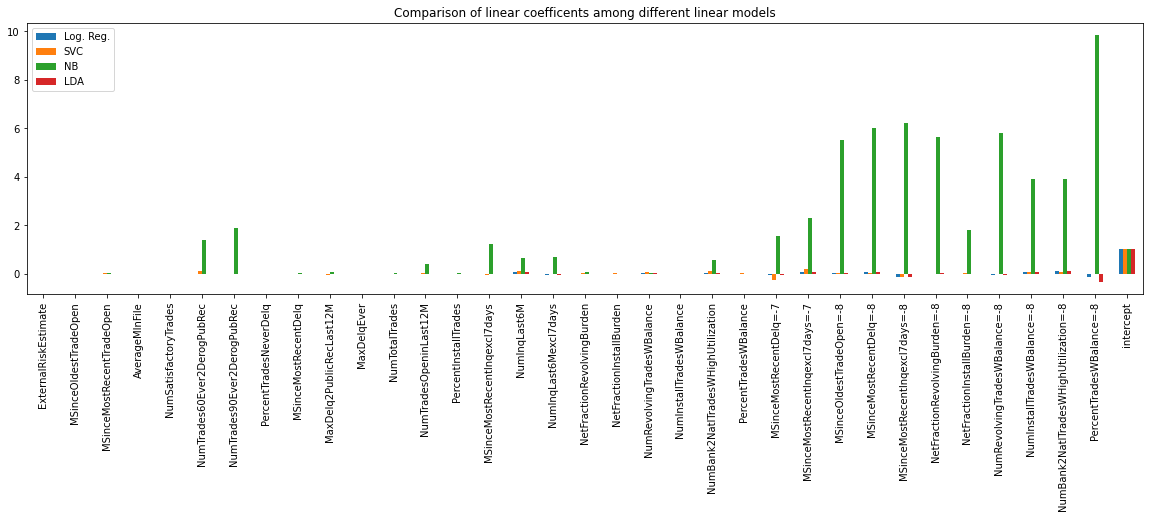

In [22]:
ANSWER_KEY['linear_coefficients_scaled'].plot.bar(figsize=(20,5))
plt.title('Comparison of linear coefficents among different linear models');

We also observe that the models are not identical by looking at their predictions. (Note that the models could be quite similar to each other, which is often the case).

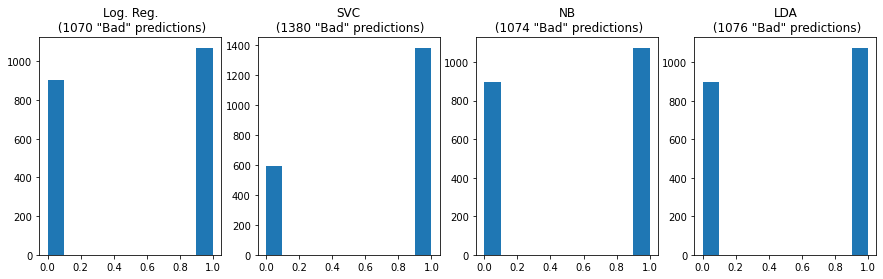

In [23]:
fig, axes = plt.subplots(1,4,figsize=(15,4))
axes[0].hist(log_reg.predict(X_train_t_val))
axes[1].hist(svc.predict(X_train_t_val))
axes[2].hist(nb.predict(X_train_t_val))
axes[3].hist(lda.predict(X_train_t_val));
axes[0].set_title('Log. Reg.\n (%d "Bad" predictions)'%sum(log_reg.predict(X_train_t_val)))
axes[1].set_title('SVC\n (%d "Bad" predictions)'%sum(svc.predict(X_train_t_val)))
axes[2].set_title('NB\n (%d "Bad" predictions)'%sum(nb.predict(X_train_t_val)))
axes[3].set_title('LDA\n (%d "Bad" predictions)'%sum(lda.predict(X_train_t_val)));

Next, let us manually compute the predictions that each model makes. To this end, for a given observation $x$, we will need to multiply each feature of $x$ by its respective coefficient and then add the intercept.

In [24]:
# example of manually computing the prediction of the logistic regression model 
# we will work with the first observation in the data
observation = X_train_t_val.iloc[0] 

# element-wise multiplication by coefficients, summation, and addition of the intercept
sum(observation*log_reg_coefficients[:-1]) + log_reg_coefficients[-1] 

1.5213739124552306

In [25]:
# an equivalent way using np.dot (inner product)
np.dot(X_train_t_val.iloc[0],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] 

1.5213739124552297

In [26]:
log_reg_coefficients.shape

(35,)

The first 34 values of `log_reg_coefficients` hold the linear coefficients and the last value is the intercept. Since the linear function returned a positive value, the prediction is `1`, otherwise, the prediction would have been `0`. In the next cell, we apply the linear function to the first 4 observations in `X_train_t_val`:

In [27]:
np.dot(X_train_t_val.iloc[:4,:],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] 

array([ 1.52137391, -0.40893662,  0.33605322, -1.94891908])

We can compare each the result with 0 to see if the predictions are `1` or `0`:

In [28]:
(np.dot(X_train_t_val.iloc[:4,:],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] >0).astype(int)

array([1, 0, 1, 0])

And this is exactly what we get when we use the logistic regression model prediction function `.predict()`

In [29]:
log_reg.predict(X_train_t_val.iloc[:4,:])

array([1, 0, 1, 0], dtype=int32)

As a sanity check, we compare the predictions on all datasets:

In [30]:
for X in [X_train_t_tr, X_train_t_val, X_test_t]: # compare train, validation and test sets
    print(((np.dot(X,log_reg_coefficients[:-1]) + log_reg_coefficients[-1] >0).astype(int) == log_reg.predict(X)).all())

True
True
True


### q4
Using the function `np.dot` and `np.mean` compute the validation set accuracy of the logistic regression model. Assign the answer to the variable `log_reg_val_accuracy` (you should not use the function `.predict()` or any other sk-learn functions).

In [31]:
#Confusion matrix
# [662, 290]
# [240, 780]

In [32]:
#Our predictions: # Validation data: X_train_t_val: (1972, 34) Y_train_t_val: (1972,)
log_reg_val_accuracy = (662+780)/(662+780+290+240) #(TP+TN)/(TP+TN+FP+FN)
### 
### YOUR CODE HERE
###


In [33]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['log_reg_val_accuracy'], log_reg_val_accuracy, rtol=0, atol=0.01).all()), 'testing log_reg_val_accuracy'
### END TEST

In [34]:
# expected answer
ANSWER_KEY['log_reg_val_accuracy']

0.731237322515213

Let us now take a closer look at the coefficients of the logistic regression model.

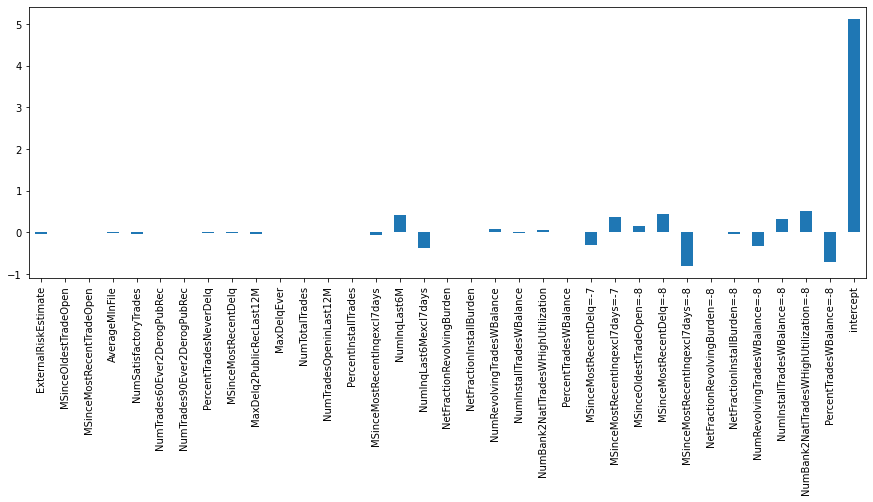

In [35]:
linear_coefficients['Log. Reg.'].plot.bar(figsize=(15,5));

Some of the coefficients are considerably smaller than others. 

In [36]:
linear_coefficients['Log. Reg.']

ExternalRiskEstimate                    -0.046431
MSinceOldestTradeOpen                   -0.000879
MSinceMostRecentTradeOpen                0.004238
AverageMInFile                          -0.007416
NumSatisfactoryTrades                   -0.036288
NumTrades60Ever2DerogPubRec              0.017489
NumTrades90Ever2DerogPubRec             -0.002602
PercentTradesNeverDelq                  -0.010462
MSinceMostRecentDelq                    -0.007812
MaxDelq2PublicRecLast12M                -0.048243
MaxDelqEver                              0.019295
NumTotalTrades                           0.002927
NumTradesOpeninLast12M                   0.005744
PercentInstallTrades                     0.006542
MSinceMostRecentInqexcl7days            -0.061364
NumInqLast6M                             0.423083
NumInqLast6Mexcl7days                   -0.372774
NetFractionRevolvingBurden               0.010735
NetFractionInstallBurden                 0.003615
NumRevolvingTradesWBalance               0.081017


Does this mean we can ignore them? Let's try.

### q5
The coefficient associated with `ExternalRiskEstimate` is an order of magnitude smaller than some of the other coefficients. Create the pandas series `modified_log_reg` which is identical to `linear_coefficients['Log. Reg.']` with the difference that the coefficient associated with `ExternalRiskEstimate` is set to 0.

In [37]:
modified_log_reg = linear_coefficients['Log. Reg.'].replace(to_replace = -0.04643109539262506, value = 0) #The number was rounded

###
### YOUR CODE HERE
###


In [38]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['modified_log_reg'].round(2)
diff = sol.compare(modified_log_reg.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing modified_log_reg'
### END TEST 

Compute the prediction accuracy on the validation set of the new model represented by `modified_log_reg` and assign the answer to the variable `accuracy_modified_log_reg`.

In [39]:
#Confusion matrix
# [0,  952],
# [0, 1020]]

In [40]:
accuracy_modified_log_reg = (0+1020)/(0+0+1020+952)
accuracy_modified_log_reg
###
### YOUR CODE HERE
###


0.5172413793103449

In [41]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['accuracy_modified_log_reg'], accuracy_modified_log_reg, rtol=0, atol=0.01).all()), 'testing accuracy_modified_log_reg'
### END TEST

In [42]:
ANSWER_KEY['accuracy_modified_log_reg']

0.5172413793103449

The new model is not performing well. The reason is that the magnitude of the features is different:

In [43]:
X_train_t_tr.mean()

ExternalRiskEstimate                      72.018594
MSinceOldestTradeOpen                    200.649822
MSinceMostRecentTradeOpen                  9.546653
AverageMInFile                            78.911765
NumSatisfactoryTrades                     21.218222
NumTrades60Ever2DerogPubRec                0.584686
NumTrades90Ever2DerogPubRec                0.385565
PercentTradesNeverDelq                    92.225490
MSinceMostRecentDelq                      21.674075
MaxDelq2PublicRecLast12M                   5.745267
MaxDelqEver                                6.365281
NumTotalTrades                            22.770791
NumTradesOpeninLast12M                     1.868154
PercentInstallTrades                      34.778059
MSinceMostRecentInqexcl7days               2.524132
NumInqLast6M                               1.492563
NumInqLast6Mexcl7days                      1.430696
NetFractionRevolvingBurden                35.067740
NetFractionInstallBurden                  68.525181
NumRevolving

The average value of `ExternalRiskEstimate` is among the highest. We can compute the average contribution of each feature to the linear function:

In [44]:
(X_train_t_val* log_reg.coef_[0]).mean().abs().sort_values(ascending=False)

ExternalRiskEstimate                     3.342709
PercentTradesNeverDelq                   0.966460
NumSatisfactoryTrades                    0.766879
NumInqLast6M                             0.583134
AverageMInFile                           0.583095
NumInqLast6Mexcl7days                    0.495457
NetFractionRevolvingBurden               0.373443
NumRevolvingTradesWBalance               0.334955
MaxDelq2PublicRecLast12M                 0.277960
NetFractionInstallBurden                 0.247259
PercentInstallTrades                     0.224230
MSinceOldestTradeOpen                    0.178095
MSinceMostRecentDelq                     0.171752
MSinceMostRecentInqexcl7days             0.145218
MSinceMostRecentDelq=-7                  0.139678
MaxDelqEver                              0.123111
NumBank2NatlTradesWHighUtilization       0.068591
MSinceMostRecentInqexcl7days=-7          0.067409
PercentTradesWBalance                    0.067349
NumTotalTrades                           0.066019


We see that on average, `ExternalRiskEstimate` has a large impact on the predictions, despite it's relative small coefficient value (shown below)

In [45]:
linear_coefficients['Log. Reg.'].abs().sort_values(ascending=False)

intercept                                5.122370
MSinceMostRecentInqexcl7days=-8          0.809830
PercentTradesWBalance=-8                 0.715183
NumBank2NatlTradesWHighUtilization=-8    0.509876
MSinceMostRecentDelq=-8                  0.435123
NumInqLast6M                             0.423083
NumInqLast6Mexcl7days                    0.372774
MSinceMostRecentInqexcl7days=-7          0.364192
NumRevolvingTradesWBalance=-8            0.318922
NumInstallTradesWBalance=-8              0.310313
MSinceMostRecentDelq=-7                  0.293964
MSinceOldestTradeOpen=-8                 0.144904
NumRevolvingTradesWBalance               0.081017
MSinceMostRecentInqexcl7days             0.061364
NumBank2NatlTradesWHighUtilization       0.061195
MaxDelq2PublicRecLast12M                 0.048243
ExternalRiskEstimate                     0.046431
NumSatisfactoryTrades                    0.036288
NetFractionInstallBurden=-8              0.034850
MaxDelqEver                              0.019295


Let's try something different. Let's train another logistic model but this time train it without `ExternalRiskEstimate` which happens to be the first feature. initialize the variables `X_train_t_tr_wo_ExternalRiskEstimate` and `Y_train_t_tr_wo_ExternalRiskEstimate` to hold the train data without the feature `ExternalRiskEstimate` (based on `X_train_t_tr` and `Y_train_t_tr`). Similarly, create the variables 
`X_train_t_val_wo_ExternalRiskEstimate` and `Y_train_t_val_wo_ExternalRiskEstimate` corresponding to the validation set (based on `X_train_t_val` and `Y_train_t_val`). 

Observe that no changes are made to the labels here.

In [46]:
X_train_t_tr_wo_ExternalRiskEstimate = X_train_t_tr.drop("ExternalRiskEstimate", axis = 1)
Y_train_t_tr_wo_ExternalRiskEstimate = Y_train_t_tr
X_train_t_val_wo_ExternalRiskEstimate = X_train_t_val.drop("ExternalRiskEstimate", axis = 1)
Y_train_t_val_wo_ExternalRiskEstimate = Y_train_t_val

###
### YOUR CODE HERE
###

In [47]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_train_t_tr_wo_ExternalRiskEstimate'].round(2)
diff = sol.compare(X_train_t_tr_wo_ExternalRiskEstimate.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_train_t_tr_wo_ExternalRiskEstimate'
### END TEST 

In [48]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_train_t_tr_wo_ExternalRiskEstimate'].round(2)
diff = sol.compare(Y_train_t_tr_wo_ExternalRiskEstimate.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_train_t_tr_wo_ExternalRiskEstimate'
### END TEST 

In [49]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_train_t_val_wo_ExternalRiskEstimate'].round(2)
diff = sol.compare(X_train_t_val_wo_ExternalRiskEstimate.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_train_t_val_wo_ExternalRiskEstimate'
### END TEST 

In [50]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_train_t_val_wo_ExternalRiskEstimate'].round(2)
diff = sol.compare(Y_train_t_val_wo_ExternalRiskEstimate.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_train_t_val_wo_ExternalRiskEstimate'
### END TEST 

In [51]:
# Sanity check:
print('dimensions of X_train_t_tr:',X_train_t_tr.shape) 
print('dimensions of X_train_t_tr_wo_ExternalRiskEstimate:',ANSWER_KEY['X_train_t_tr_wo_ExternalRiskEstimate'].shape)

dimensions of X_train_t_tr: (5916, 34)
dimensions of X_train_t_tr_wo_ExternalRiskEstimate: (5916, 33)


Now let's train and evaluate the model that does not use the feature `ExternalRiskEstimate`.

In [52]:
log_reg_wo_ExternalRiskEstimate = LogisticRegression(max_iter=10000).fit(ANSWER_KEY['X_train_t_tr_wo_ExternalRiskEstimate'], 
                                                                         ANSWER_KEY['Y_train_t_tr_wo_ExternalRiskEstimate']) 

In [53]:
y_pred_train_wo_ER = log_reg_wo_ExternalRiskEstimate.predict(X_train_t_tr_wo_ExternalRiskEstimate)

Compute the train and validation accuracies of the new linear model `log_reg_wo_ExternalRiskEstimate` and assign the results to the variables `accuracy_retrained_model_train` and `accuracy_retrained_model_validation`. Create the variable `retrained_log_reg` which is a pandas series whose indexes are similar to that of `modified_log_reg` and whose values are used by the linear classifier `log_reg_wo_ExternalRiskEstimate`. 

Note that while the feature `ExternalRiskEstimate` is not needed for the model `log_reg_wo_ExternalRiskEstimate`, we keep it to make it easier to compare it with other models. The coefficient associated with `ExternalRiskEstimate` should simply be set equal to 0.

In [54]:
# log_reg_wo_ExternalRiskEstimate.coef_, log_reg_wo_ExternalRiskEstimate.intercept_

In [56]:
accuracy_retrained_model_train = log_reg_wo_ExternalRiskEstimate.score(X_train_t_tr_wo_ExternalRiskEstimate, Y_train_t_tr_wo_ExternalRiskEstimate)
accuracy_retrained_model_validation =  log_reg_wo_ExternalRiskEstimate.score(X_train_t_val_wo_ExternalRiskEstimate,Y_train_t_val_wo_ExternalRiskEstimate)
# retrained_log_reg = "log_reg_wo_ExternalRiskEstimate.coef_"

coefficients = np.append(log_reg_wo_ExternalRiskEstimate.coef_,log_reg_wo_ExternalRiskEstimate.intercept_)
modified_log_reg[1:]=coefficients
retrained_log_reg = modified_log_reg


In [57]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['accuracy_retrained_model_train'], accuracy_retrained_model_train, rtol=0, atol=0.01).all()), 'testing accuracy_retrained_model_train'
### END TEST

In [58]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['accuracy_retrained_model_validation'], accuracy_retrained_model_validation, rtol=0, atol=0.01).all()), 'testing accuracy_retrained_model_validation'
### END TEST

In [59]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['retrained_log_reg'].round(2)
diff = sol.compare(retrained_log_reg.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing retrained_log_reg'
### END TEST 

Let's compare accuracies and linear coefficients

In [60]:
print('Log. Reg. retrained model train accuracy: %.3f'%accuracy_retrained_model_train)
print('Log. Reg. retrained model validation accuracy: %.3f\n'%accuracy_retrained_model_validation)

print('Log. Reg. original model train accuracy: %.3f'%log_reg.score(X_train_t_tr, Y_train_t_tr))
print('Log. Reg. original model validation accuracy: %.3f'%log_reg.score(X_train_t_val, Y_train_t_val))

Log. Reg. retrained model train accuracy: 0.741
Log. Reg. retrained model validation accuracy: 0.731

Log. Reg. original model train accuracy: 0.741
Log. Reg. original model validation accuracy: 0.731


The performance (in terms of accuracy) is quite similar. Let's compare the coefficients:

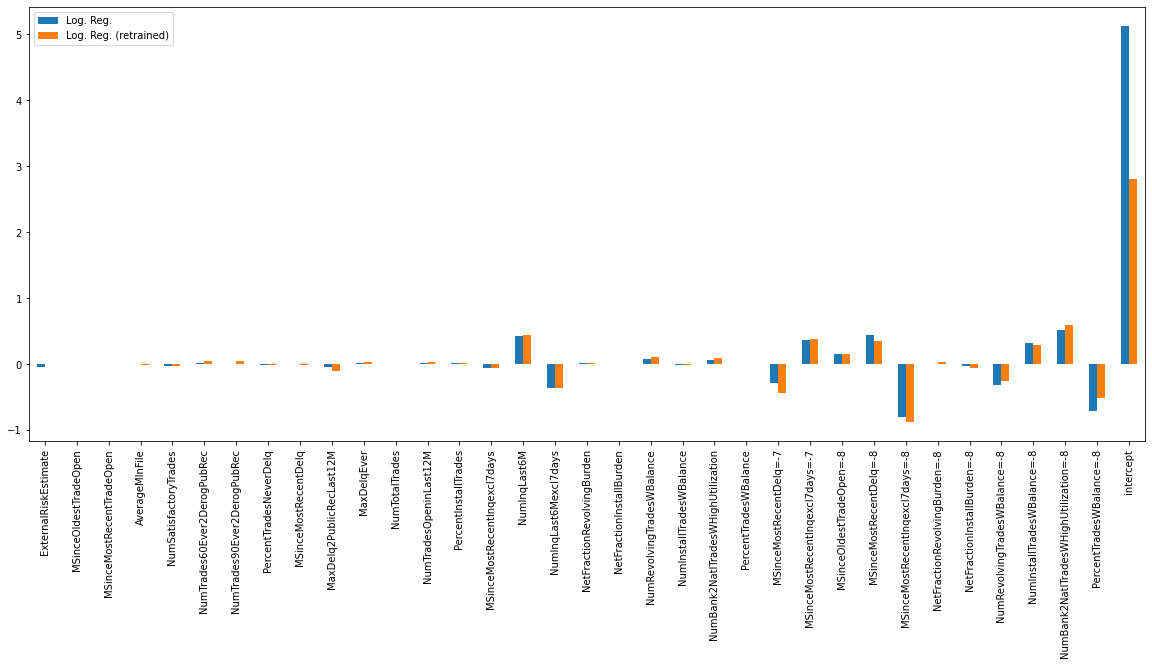

In [61]:
pd.merge(linear_coefficients['Log. Reg.'],ANSWER_KEY['retrained_log_reg'], left_index=True, right_index=True).plot.bar(figsize=(20,8));

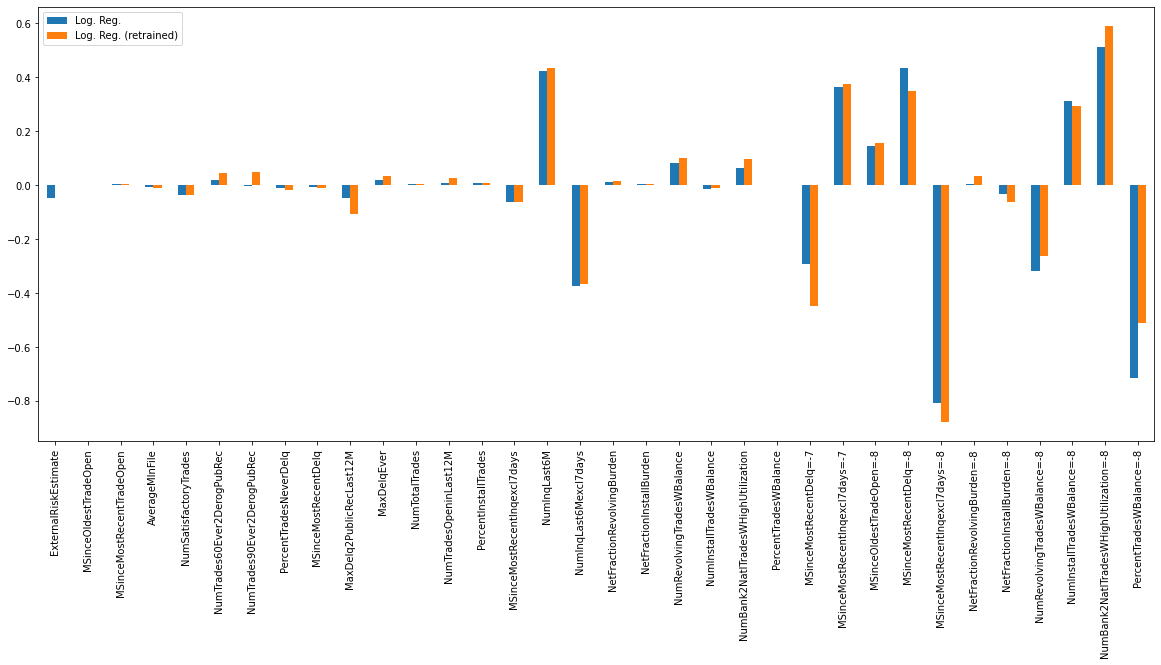

In [62]:
# simliar plot only without the intercept
pd.merge(linear_coefficients['Log. Reg.'],ANSWER_KEY['retrained_log_reg'], left_index=True, right_index=True).iloc[:-1,:].plot.bar(figsize=(20,8));

The coefficients are somewhat different. It appears that training a logistic regression model without the feature `ExternalRiskEstimate` results in a redistribution of the coefficients.

It turns out that in practice, there are often multiple models whose performance is very similar. This, for example, could result from a correlation between features which allows using different subsets of features. It raises the question of which model to use? 

Typical practical answers are:
* Use the simplest one. This is known as Occam's razor, and can be obtained by trial and error, regularization, stepwise selection (see Chapter 6 in Introduction in Statistical Learning), or integer programming based models (e.g., SLIM and RiskSLIM).
* Look carefully at the features used by each model and see which make more sense in the context of the specific prediction problem.

When debating between different models (trees vs. linear), one should consider the perspective of the user of the model and think about which one would be better suited for him or her for informing decisions. 

__Estimating probabilities__

Finally, let's briefly explore some functionalities of probabilistic models. The logistic regression model not only makes predictions (1 vs. 0) but also estimates the probability that an observation is predicted as 1 or 0. 

In sk-learn, the function `predict` returns a discrete prediction while the function `predict_proba` returns probability.

In [63]:
# make predictions about observations 0 and 1 in the validation set
log_reg.predict(X_train_t_val.iloc[[0,1],:]) 

array([1, 0], dtype=int32)

In [64]:
#  compute probabilities corresponding to observation 0 and 1 in the validation set
print(log_reg.predict_proba(X_train_t_val.iloc[[0,1],:]))

[[0.17925929 0.82074071]
 [0.60083287 0.39916713]]


The probability that the label associated with observation #0 is 1, is equal to 0.82, which is greater than 0.5 and therefore the prediction is 1. 

Let's look at the distribution of predictions. We will bucket observations according to the probabilities estimated by the model, and compute the accuracy in each bucket.

### q6

Create the dataframe `df_probs` which holds the following information about the validation set `X_train_t_val`:
1. `Prob(0)` - the probability that the model `log_reg` estimates for the label 0
2. `Prob(1)` - the probability that the model `log_reg` estimates for the label 1
3. `Prediction` - the prediction
4. `Label` - the true label
5. `Correct prediction` - is the prediction correct

An example of the output is provided below.

__Use may the function `log_reg.predict_proba` to compute probabilities.__

In [65]:
#Make a matrix that we can concatenate with our data
data1 = np.matrix(log_reg.predict_proba(X_train_t_val.iloc[:]))
data2 = np.matrix(log_reg.predict(X_train_t_val.iloc[:])).T
data3 = np.matrix(Y_train_t_val).T



#concatenate matrix
df_probs = pd.concat([pd.DataFrame(data1), 
                     pd.DataFrame(data2), 
                     pd.DataFrame(data3)],
                     axis=1)
#give a name to the cols
df_probs.columns = ["Prob(0)", "Prob(1)", "Prediction", "Label"]

#logic for the solution
df_probs['Correct prediction'] = df_probs['Prediction'] == df_probs['Label'] 
df_probs

,Prob(0),Prob(1),Prediction,Label,Correct prediction
0,0.179259,0.820741,1,1,True
1,0.600833,0.399167,0,0,True
2,0.416769,0.583231,1,1,True
3,0.875329,0.124671,0,0,True
4,0.768361,0.231639,0,0,True
...,...,...,...,...,...
1967,0.112882,0.887118,1,0,False
1968,0.500523,0.499477,0,1,False
1969,0.771116,0.228884,0,1,False
1970,0.613342,0.386658,0,0,True


In [66]:
# expected output
ANSWER_KEY['df_probs'].head()

,Prob(0),Prob(1),Prediction,Label,Correct prediction
0,0.1793,0.8207,1,1,True
1,0.6008,0.3992,0,0,True
2,0.4168,0.5832,1,1,True
3,0.8753,0.1247,0,0,True
4,0.7684,0.2316,0,0,True


In [67]:
### BEGIN TEST (DO NOT REMOVE CELL) (required handling rounding)
sol = ANSWER_KEY['df_probs']
diff = sol.loc[:,"Correct prediction"].compare(df_probs.loc[:,"Correct prediction"], keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing "Correct prediction" column of df_probs'

diff = pd.Series({"Prob(0)" : True,
                  "Prob(1)" : True,
                  "Prediction" : True,
                  "Label" : True}).compare(((ANSWER_KEY['df_probs'].iloc[:,:-1] - df_probs.iloc[:,:-1]).abs() <= 0.01).all(), keep_equal=False)
assert(len(diff)==0), 'testing remaining columns of df_probs'
### END TEST 

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(20,8))
axes[0].hist(ANSWER_KEY['df_probs']['Prob(1)'], bins=50)
axes[0].set_title('Distribution of predictions')
ANSWER_KEY['df_probs'].round(2).groupby('Prob(1)').mean()['Correct prediction'].plot(ax=axes[1], title='% of correct predictions as function of Prob(1)');
axes[1].axhline(ANSWER_KEY['df_probs']['Correct prediction'].mean());

The figure shows that in many cases (when the probability is sufficiently small or large; see the histogram on the left), we are more confident about the model predictions (that's when the percentage of correct predictions is high). 

However, there are also many observations for which the probability is close to 0.5. In these cases we are less confident about our predictions (on the right figure we see that prediction accuracy drops when the probability is around 0.5). 

Intuitively, this is because observations for which the predicted probability is close to 0.5 are close to the decision boundary, an area where it is typically more difficult to classify.

## Part 2: Tree-based models

We now switch to working with tree-based models. Let's train a decision tree.

In [68]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from IPython.display import Image 
from IPython.display import IFrame
import pydot_ng as pydot 

### q7 Decision trees

In [69]:
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

Compute the train and validation accuracies and assign them to the variables `train_accuracy_DT` and `val_accuracy_DT`.

In [70]:
train_accuracy_DT = clf_tree.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_DT = clf_tree.score(X_train_t_val, Y_train_t_val)

###
### YOUR CODE HERE
###


In [71]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['train_accuracy_DT'], train_accuracy_DT, rtol=0, atol=0.01).all()), 'testing train_accuracy_DT'
### END TEST

In [72]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['val_accuracy_DT'], val_accuracy_DT, rtol=0, atol=0.01).all()), 'testing val_accuracy_DT'
### END TEST

In [73]:
print('Train accuracy (DT): %.3f'%ANSWER_KEY['train_accuracy_DT'])
print('Validation accuracy (DT): %.3f'%ANSWER_KEY['val_accuracy_DT'])

Train accuracy (DT): 0.716
Validation accuracy (DT): 0.707


Let's visualize the tree

In [74]:
with open("tree_stump.dot", 'w') as f:                   
    # intermediate step: export the visualization of the model to a .dot file
    tree.export_graphviz(clf_tree, out_file=f, feature_names=column_names, filled=True, label='all')     
    
pydot.graph_from_dot_file('tree_stump.dot').write_pdf('tree_stump.pdf') # convert .dot to .pdf
IFrame('tree_stump.pdf', width=400, height=300)                         # display pdf in jupyter

The model is surprisingly accurate considering the fact that it is a decision stump (decision tree of depth 1), and that the accuracy is close to other models we previously trained on this dataset.

Let's see what happens when we change the depth of the tree. Initialize the variable `tree_accuracy` to a dataframe whose indexes run from 1 to 12, with two columns, one for `Train accuracy` and one for `Validation accuracy`. Use the default parameters of `DecisionTreeClassifier` except for the depth and setting `random_state=0`.

In [90]:
train_acc = []
val_acc = []
for i in range(12):
    clf_tree = DecisionTreeClassifier(max_depth=i+1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)
    train_acc.append(clf_tree.score(X_train_t_tr, Y_train_t_tr))
    val_acc.append(clf_tree.score(X_train_t_val, Y_train_t_val))
labels = [x for x in range(1,13)]
dataset = {"Depth": labels, "Train accuracy": train_acc, "Validation accuracy": val_acc}
tree_accuracy1 = pd.DataFrame(dataset, labels)
tree_accuracy = tree_accuracy1.set_index("Depth")

In [86]:
# expected output
ANSWER_KEY['tree_accuracy'].head()

,Train accuracy,Validation accuracy
Depth,,
1,0.715686,0.706897
2,0.715686,0.706897
3,0.716362,0.699797
4,0.724814,0.708925
5,0.739351,0.706389


In [91]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['tree_accuracy'].round(2)
diff = sol.compare(tree_accuracy.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing tree_accuracy'
### END TEST 

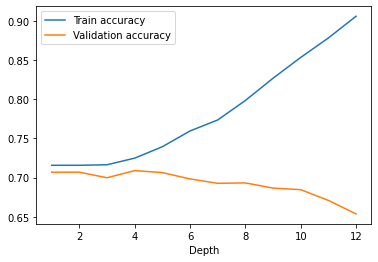

In [92]:
ANSWER_KEY['tree_accuracy'].plot();

Plotting the train and validation accuracies as a function of the tree depth, we observe that there is no improvement the the validation accuracy (in fact there is a deterioration at some point), while the train accuracy keeps improving. This is an indication of overfitting. This is not surprising with decision trees which can perfectly classify any dataset with sufficient depth (as long as there are no two observations in the dataset with identical features and opposite predictions).

Let's try to tune the hyperparameters of the model to improve its performance.  

In [93]:
IFrame('https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html', width=950, height=300)

In [94]:
param_grid = [{'max_depth':range(1,13),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,6,20,100,10000]}]

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 13),
                          'max_leaf_nodes': [2, 4, 6, 20, 100, 10000],
                          'min_samples_leaf': [10, 20, 100]}],
             scoring='accuracy')

Read the documentation to see what each of the hyperparameters specified above does.

Create the dataframe `tree_accuracy_grid` based on the results of the grid search, which are stored in the variable `grid_search`. The dataframe should have a row per each configuration, and columns for the hyper parameters `max_depth`, `max_leaf_nodes`, `min_samples_leaf`, and `Accuracy`.

In [95]:
# tree_accuracy_grid = "replace this string with your answer"

# max_depth	max_leaf_nodes	min_samples_leaf	Accuracy
max_depth = np.matrix(grid_search.cv_results_["param_max_depth"]).T
max_leaf_nodes = np.matrix(grid_search.cv_results_["param_max_leaf_nodes"]).T
min_samples_leaf = np.matrix(grid_search.cv_results_["param_min_samples_leaf"]).T
Accuracy = np.matrix(grid_search.cv_results_["mean_test_score"]).T

data = pd.concat([pd.DataFrame(max_depth), 
                  pd.DataFrame(max_leaf_nodes), 
                  pd.DataFrame(min_samples_leaf), 
                  pd.DataFrame(Accuracy)], 
                axis = 1)
data.columns = ["max_depth", "max_leaf_nodes", "min_samples_leaf", "Accuracy"]
tree_accuracy_grid = data

In [96]:
# expected output
ANSWER_KEY['tree_accuracy_grid'].head()

,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,1,2,10,0.713491
1,1,2,20,0.713491
2,1,2,100,0.713491
3,1,4,10,0.713491
4,1,4,20,0.713491


In [97]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['tree_accuracy_grid'].round(2)
diff = sol.compare(tree_accuracy_grid.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing tree_accuracy_grid'
### END TEST 

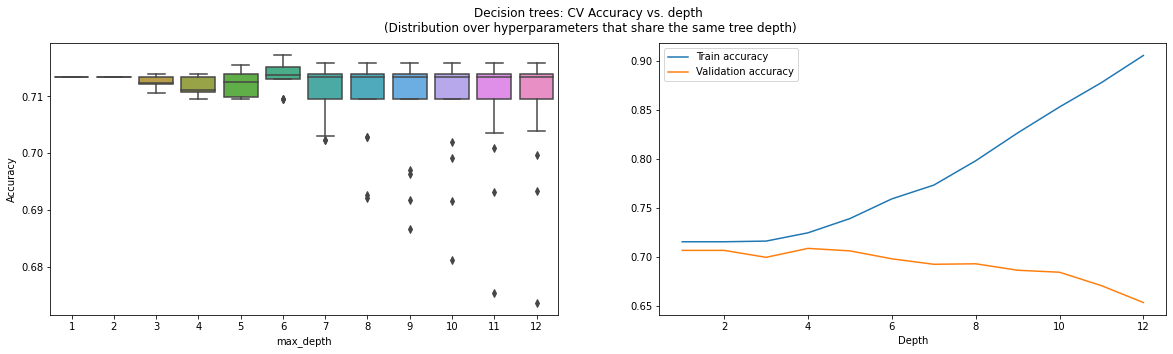

In [98]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('Decision trees: CV Accuracy vs. depth \n(Distribution over hyperparameters that share the same tree depth)')
sns.boxplot(x="max_depth", y='Accuracy', data=ANSWER_KEY['tree_accuracy_grid'], ax=axes[0]);
tree_accuracy.plot(ax=axes[1]);

The figure above shows the cross validation accuracy as a function of the maximal depth (since we're exploring many configuration, for each depth we have several configurations whose accuracies can be shown as a distribution). The right figure is identical to the figure presented earlier. Observe that the y-axis scale is different.

We see that with the right tuning, we can mitigate overfitting, which happens due to the increasing depth. However, it appears that we do not improve significantly the performance and we may simply select the decision stump.

### q8 Ensemble methods - Random forests

Instead of creating a single increasingly more complex tree, let's to create an ensemble of trees. Compute the train and validation accuracies of the Random Forest model below and assign them to the variables `train_accuracy_RF` and `val_accuracy_RF`.

In [99]:
rf = RandomForestClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [100]:
train_accuracy_RF = rf.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_RF = rf.score(X_train_t_val, Y_train_t_val)
###
### YOUR CODE HERE
###


In [101]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['train_accuracy_RF'], train_accuracy_RF, rtol=0, atol=0.01).all()), 'testing train_accuracy_RF'
### END TEST

In [102]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['val_accuracy_RF'], val_accuracy_RF, rtol=0, atol=0.01).all()), 'testing val_accuracy_RF'
### END TEST

In [103]:
print('Train accuracy (RF): %.3f'%ANSWER_KEY['train_accuracy_RF'])
print('Validation accuracy (RF): %.3f'%ANSWER_KEY['val_accuracy_RF'])

Train accuracy (RF): 0.724
Validation accuracy (RF): 0.716


We gain a roughly 1% improvement comparing to the decision stump. Let's try to improve the model by performing hyper-parameter tuning. Read the documentation to see what each of the hyperparameters specified above does (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Note: expect the running time to be longer here. We train `3x2x3x4` RF models, each consisting of 10-50 decision trees.


In [104]:
param_grid = [{'n_estimators':[10,20,50],
               'max_depth':range(1,8),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,8,16]}]

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 8),
                          'max_leaf_nodes': [2, 4, 8, 16],
                          'min_samples_leaf': [10, 20, 100],
                          'n_estimators': [10, 20, 50]}],
             scoring='accuracy')

Create the dataframe `rf_accuracy_grid` based on the results of the grid search, which are stored in the variable `grid_search`. The dataframe should have a row per each configuration, and columns for the hyper parameters `n_estimators`, `max_depth`, `max_leaf_nodes`, `min_samples_leaf`, and `Accuracy`.

In [105]:
# max_depth	max_leaf_nodes	min_samples_leaf	Accuracy
n_stimators1 = np.matrix(grid_search.cv_results_["param_n_estimators"]).T
max_depth1 = np.matrix(grid_search.cv_results_["param_max_depth"]).T
max_leaf_nodes1 = np.matrix(grid_search.cv_results_["param_max_leaf_nodes"]).T
min_samples_leaf1 = np.matrix(grid_search.cv_results_["param_min_samples_leaf"]).T
Accuracy1 = np.matrix(grid_search.cv_results_["mean_test_score"]).T

data1 = pd.concat([pd.DataFrame(n_stimators1),
                  pd.DataFrame(max_depth1), 
                  pd.DataFrame(max_leaf_nodes1), 
                  pd.DataFrame(min_samples_leaf1), 
                  pd.DataFrame(Accuracy1)], 
                axis = 1)
data1.columns = ["n_estimators","max_depth", "max_leaf_nodes", "min_samples_leaf", "Accuracy"]
rf_accuracy_grid = data1
rf_accuracy_grid

,n_estimators,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,10,1,2,10,0.703012
1,20,1,2,10,0.720592
2,50,1,2,10,0.718733
3,10,1,2,20,0.703012
4,20,1,2,20,0.720592
...,...,...,...,...,...
247,20,7,16,20,0.729887
248,50,7,16,20,0.730056
249,10,7,16,100,0.733098
250,20,7,16,100,0.729549


In [106]:
# expected output
ANSWER_KEY['rf_accuracy_grid'].head()

,n_estimators,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,10,1,2,10,0.703012
1,20,1,2,10,0.720592
2,50,1,2,10,0.718733
3,10,1,2,20,0.703012
4,20,1,2,20,0.720592


In [107]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['rf_accuracy_grid']
diff = sol.compare(rf_accuracy_grid, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing rf_accuracy_grid'
### END TEST 

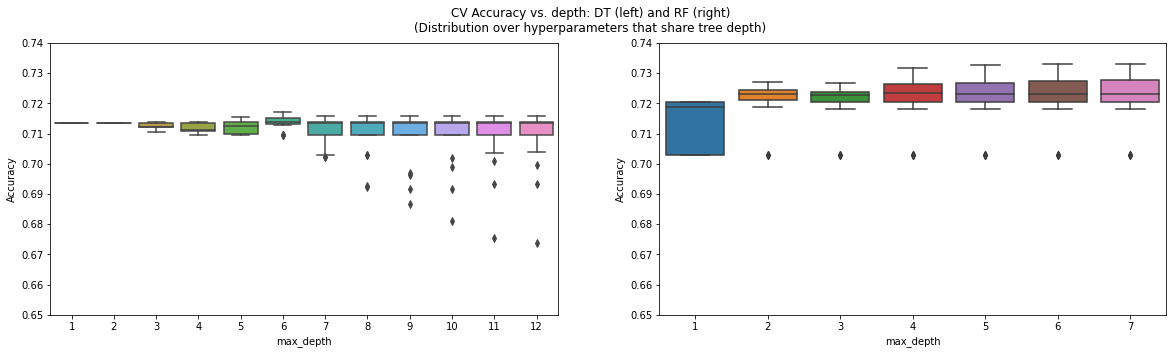

In [108]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('CV Accuracy vs. depth: DT (left) and RF (right)\n(Distribution over hyperparameters that share tree depth)')
sns.boxplot(x="max_depth", y='Accuracy', data=ANSWER_KEY['tree_accuracy_grid'], ax=axes[0]);
sns.boxplot(x="max_depth", y='Accuracy', data=ANSWER_KEY['rf_accuracy_grid'], ax=axes[1]);
axes[0].set_ylim(0.65,0.74);axes[1].set_ylim(0.65,0.74);

We see in the figure above that with some hyperparameter tuning we can further improve the accuracy of the RF model.

In [109]:
# the best configuration
grid_search.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 100,
 'n_estimators': 10}

In [110]:
# a model trained using the best configuration on all folds
best_RF_model = grid_search.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=7, max_leaf_nodes=16, min_samples_leaf=100,
                       n_estimators=10, random_state=0)

Compute the train and validation accuracies of the optimized Random Forest `best_RF_model` and assign them to the variables `train_accuracy_RF_opt` and `val_accuracy_RF_opt`.

In [111]:
train_accuracy_RF_opt = best_RF_model.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_RF_opt = best_RF_model.score(X_train_t_val, Y_train_t_val)
###
### YOUR CODE HERE
###


In [112]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['train_accuracy_RF_opt'], train_accuracy_RF_opt, rtol=0, atol=0.01).all()), 'testing train_accuracy_RF_opt'
### END TEST

In [113]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['val_accuracy_RF_opt'], val_accuracy_RF_opt, rtol=0, atol=0.01).all()), 'testing val_accuracy_RF_opt'
### END TEST

In [114]:
print('Train accuracy (RF optimized): %.3f'%ANSWER_KEY['train_accuracy_RF_opt'])
print('Validation accuracy (RF optimized): %.3f'%ANSWER_KEY['val_accuracy_RF_opt'])

Train accuracy (RF optimized): 0.741
Validation accuracy (RF optimized): 0.720


An issue that arises when working with ensemble models is that now our model averages 10 trees (n_estimators=10 in the best configuration), each of depth of at most 7 (that is, with up to $2^7=128$ leaf nodes). This makes it difficult to understand how the model works. One approach that is used in practice is to compute the _feature importance_ by computing the overall improvement in the model that can be attributed to splitting using each feature. 

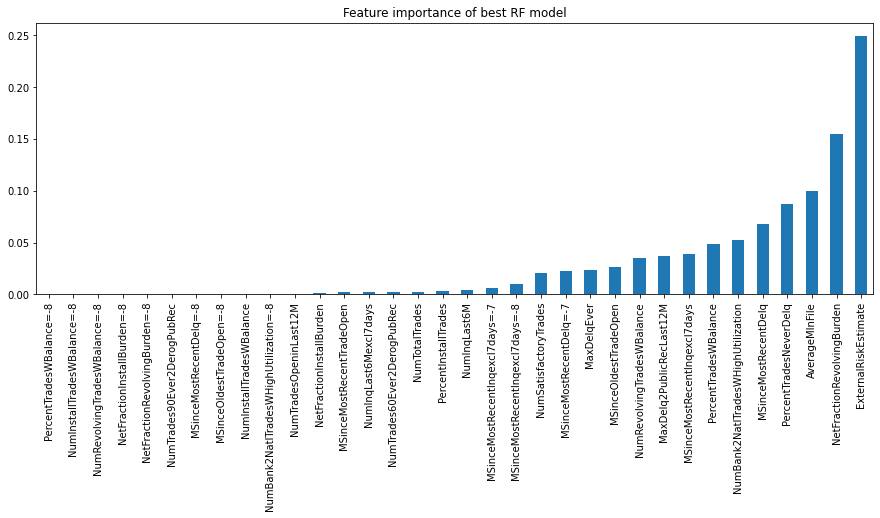

In [115]:
# plot feature importance
pd.Series(data=grid_search.best_estimator_.feature_importances_, 
          index=column_names).sort_values().plot.bar(figsize=(15,5), 
                                                     title='Feature importance of best RF model');

It seems that our RF model still heavily relies on the feature `ExternalRiskEstimate`, but now it also utilizes other features.

Let's see how the CV accuracy is affected by the number of trees in the ensemble. Initialize the variable `rf_accuracy` to a dataframe whose indexes run from 10 to 190 with increments of 10, with two columns, one for `Train accuracy` and one for `Validation accuracy`. You should create the RF classifiers as follows: `RandomForestClassifier(n_estimators=?, random_state=0, max_depth=1)` where ? is replaced by the ensemble size.

In [119]:
n_stimators1 = np.matrix(grid_search.cv_results_["param_n_estimators"]).T
max_depth1 = np.matrix(grid_search.cv_results_["param_max_depth"]).T
max_leaf_nodes1 = np.matrix(grid_search.cv_results_["param_max_leaf_nodes"]).T
min_samples_leaf1 = np.matrix(grid_search.cv_results_["param_min_samples_leaf"]).T
Accuracy1 = np.matrix(grid_search.cv_results_["mean_test_score"]).T

data1 = pd.concat([pd.DataFrame(n_stimators1),
                  pd.DataFrame(max_depth1), 
                  pd.DataFrame(max_leaf_nodes1), 
                  pd.DataFrame(min_samples_leaf1), 
                  pd.DataFrame(Accuracy1)], 
                axis = 1)
data1.columns = ["n_estimators","max_depth", "max_leaf_nodes", "min_samples_leaf", "Accuracy"]
rf_accuracy_grid = data1
rf_accuracy_grid

,n_estimators,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,10,1,2,10,0.703012
1,20,1,2,10,0.720592
2,50,1,2,10,0.718733
3,10,1,2,20,0.703012
4,20,1,2,20,0.720592
...,...,...,...,...,...
247,20,7,16,20,0.729887
248,50,7,16,20,0.730056
249,10,7,16,100,0.733098
250,20,7,16,100,0.729549


In [142]:
# rf_accuracy = "replace this string with your answer"
Train_accuracy = []
Validation_accuracy = []

for i in (np.arange(10, 200, 10)):
    rfc = RandomForestClassifier(n_estimators=i, random_state=0, max_depth=1).fit(X_train_t_tr, Y_train_t_tr)
    Train_accuracy.append(rfc.score(X_train_t_tr, Y_train_t_tr))
    Validation_accuracy.append(rfc.score(X_train_t_val, Y_train_t_val))
    
labels = np.arange(10, 200, 10)
dataset = {"n_estimators": labels, "Train accuracy": Train_accuracy, "Validation accuracy": Validation_accuracy}
tree_accuracy1 = pd.DataFrame(dataset, labels)
rf_accuracy = tree_accuracy1.set_index("n_estimators")

In [143]:
ANSWER_KEY['rf_accuracy'].head()

,Train accuracy,Validation accuracy
n_estimators,,
10,0.704868,0.694726
20,0.720926,0.712982
30,0.720926,0.710446
40,0.720419,0.709432
50,0.719912,0.708418


In [144]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['rf_accuracy'].round(2)
diff = sol.compare(rf_accuracy.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing rf_accuracy'
### END TEST 

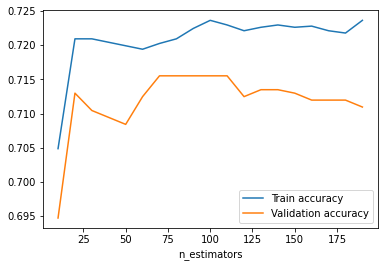

In [145]:
ANSWER_KEY['rf_accuracy'].plot();

We observe that the performance of the ensemble tends to initially improve and then stabilizes as the ensemble grows. 

### q9  Ensemble methods - Boosting

Let's to create another ensemble of trees, this time using Boosting. Compute the train and validation accuracies of the Boosting model below and assign them to the variables `train_accuracy_boosting` and `val_accuracy_boosting`.

In [146]:
clf_boosting = AdaBoostClassifier(random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [149]:
train_accuracy_boosting = clf_boosting.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_boosting = clf_boosting.score(X_train_t_val, Y_train_t_val)
###
### YOUR CODE HERE
###


In [150]:
    ### BEGIN TEST
assert(np.isclose(ANSWER_KEY['train_accuracy_boosting'], train_accuracy_boosting, rtol=0, atol=0.01).all()), 'testing train_accuracy_boosting'
### END TEST

In [151]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['val_accuracy_boosting'], val_accuracy_boosting, rtol=0, atol=0.01).all()), 'testing val_accuracy_boosting'
### END TEST

In [152]:
print('Train accuracy (boosting): %.3f'%ANSWER_KEY['train_accuracy_boosting'])
print('Validation accuracy (boosting): %.3f'%ANSWER_KEY['val_accuracy_boosting'])
print('\nTrain accuracy (RF optimized): %.3f'%ANSWER_KEY['train_accuracy_RF_opt'])
print('Validation accuracy (RF optimized): %.3f'%ANSWER_KEY['val_accuracy_RF_opt'])
print('\nTrain accuracy (DT): %.3f'%ANSWER_KEY['train_accuracy_DT'])
print('Validation accuracy (DT): %.3f'%ANSWER_KEY['val_accuracy_DT'])

Train accuracy (boosting): 0.749
Validation accuracy (boosting): 0.728

Train accuracy (RF optimized): 0.741
Validation accuracy (RF optimized): 0.720

Train accuracy (DT): 0.716
Validation accuracy (DT): 0.707


Using the default hyperparameters, we created an ensemble model that outperforms the previous models. This will not always be the case, and one should not conclude that Boosting is always superior to Random Forests. 

There are several important hyperparameters for tuning the Boosting algorithm. One is the `base_estimator` which refers to the base model that we repeatedly train on (slight variations of) the data. The other two are `n_estimators` and `learning_rate` which go together. The first controlling the size of the ensemble (e.g., number of trees), and the second is the "step size", intuitively indicating the importance we give to each model. The smaller the learning rate, the more iterations we may need to reach the optimal ensemble. 

Let's illustrate the effect of using a small learning rate.

Initialize the variable `boosting_accuracy_learning_rate_0_01` to a dataframe whose indexes run from 10 to 190 with increments of 10, with two columns, one for `Train accuracy` and one for `Validation accuracy`. Create an  AdaBoost classifier as follows: `AdaBoostClassifier(n_estimators=?, random_state=0, learning_rate=0.01)` where ? should be replaced by the ensemble size.

In [155]:
# boosting_accuracy_learning_rate_0_01 = "replace this string with your answer"

Train_accuracy1 = []
Validation_accuracy1 = []

for i in (np.arange(10, 200, 10)):
    ada_boos = AdaBoostClassifier(n_estimators=i, random_state=0, learning_rate=0.01).fit(X_train_t_tr, Y_train_t_tr)
    Train_accuracy1.append(ada_boos.score(X_train_t_tr, Y_train_t_tr))
    Validation_accuracy1.append(ada_boos.score(X_train_t_val, Y_train_t_val))
    
labels = np.arange(10, 200, 10)
dataset = {"n_estimators": labels, "Train accuracy": Train_accuracy1, "Validation accuracy": Validation_accuracy1}
ada_accuracy1 = pd.DataFrame(dataset, labels)
boosting_accuracy_learning_rate_0_01 = ada_accuracy1.set_index("n_estimators")


In [154]:
ANSWER_KEY['boosting_accuracy_learning_rate_0_01'].head()

,Train accuracy,Validation accuracy
n_estimators,,
10,0.715686,0.706897
20,0.715686,0.706897
30,0.715686,0.706897
40,0.715686,0.706897
50,0.715686,0.706897


In [156]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['boosting_accuracy_learning_rate_0_01'].round(2)
diff = sol.compare(boosting_accuracy_learning_rate_0_01.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing boosting_accuracy_learning_rate_0_01'
### END TEST 

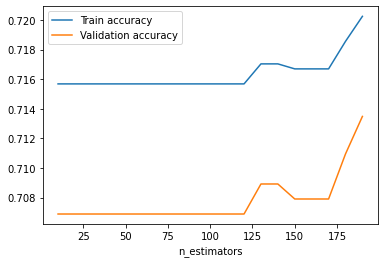

In [157]:
ANSWER_KEY['boosting_accuracy_learning_rate_0_01'].plot();

Even though we trained an ensemble with 190 trees, the learning rate is small (0.01) and therefore we will need much larger ensembles to obtain better models (assuming we keep the same learning rate).

Let's try a higher learning rate and train a larger ensemble. Initialize the variable `boosting_accuracy_learning_rate_1` to a dataframe whose indexes run from 10 to 390 with increments of 10, with two columns, one for `Train accuracy` and one for `Validation accuracy`. Create an  AdaBoost classifier as follows: `AdaBoostClassifier(n_estimators=?, random_state=0, learning_rate=1)` where ? should be replaced by the ensemble size.

In [166]:
# boosting_accuracy_learning_rate_1 = "replace this string with your answer"

Train_accuracy2 = []
Validation_accuracy2 = []

for i in (np.arange(10, 400, 10)):
    ada_boos1 = AdaBoostClassifier(n_estimators=i, random_state=0, learning_rate=1).fit(X_train_t_tr, Y_train_t_tr)
    Train_accuracy2.append(ada_boos1.score(X_train_t_tr, Y_train_t_tr))
    Validation_accuracy2.append(ada_boos1.score(X_train_t_val, Y_train_t_val))
    
labels = np.arange(10, 400, 10)
dataset = {"n_estimators": labels, "Train accuracy": Train_accuracy2, "Validation accuracy": Validation_accuracy2}
ada_accuracy2 = pd.DataFrame(dataset, labels)
boosting_accuracy_learning_rate_1 = ada_accuracy2.set_index("n_estimators")
boosting_accuracy_learning_rate_1

,Train accuracy,Validation accuracy
n_estimators,,
10,0.732082,0.716024
20,0.740196,0.720588
30,0.744591,0.722110
40,0.746619,0.722617
50,0.748986,0.727688
60,0.752366,0.730223
70,0.753212,0.727688
80,0.751183,0.727688
90,0.753888,0.727688


In [164]:
ANSWER_KEY['boosting_accuracy_learning_rate_1'].head()

,Train accuracy,Validation accuracy
n_estimators,,
10,0.732082,0.716024
20,0.740196,0.720588
30,0.744591,0.722110
40,0.746619,0.722617
50,0.748986,0.727688


In [167]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['boosting_accuracy_learning_rate_1'].round(2)
diff = sol.compare(boosting_accuracy_learning_rate_1.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing boosting_accuracy_learning_rate_1'
### END TEST 

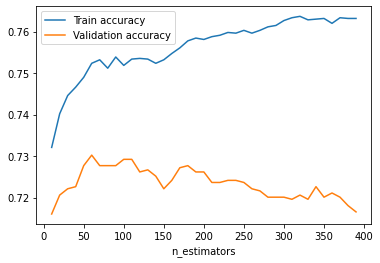

In [168]:
ANSWER_KEY['boosting_accuracy_learning_rate_1'].plot();

Now that the learning rate is sufficiently large, we achieve the optimal ensemble size using approximately 60 trees. Beyond that point, we start to overfit: the training accuracy keeps improving while the validation accuracy worsens as the ensemble grows.  

Note that simliarly to linear models where there are many linear models that work differently, there are also many variants of the Boosting algorithm. See, for example, [sk-learn](https://scikit-learn.org/stable/modules/ensemble.html), [XGBoost](https://xgboost.readthedocs.io/en/latest/), and [LightGBM](https://github.com/Microsoft/LightGBM).

# Summary


In this homework assignment, we experimented with linear and tree-based models and their key hyper-parameters to observe how they affect the resulting models.

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
